In [1]:
import pandas as pd
import numpy as np
from tipos.numero import Numero #Clase que permite evaluar la dimensiones de calidad en datos Numericos
from tipos.caracter import Caracter #Clase que permite evaluar la dimensiones de calidad en datos Caracter
from tipos.categorico import Categorica #Clase que permite evaluar la dimensiones de calidad en datos Categoricos
import matplotlib.pyplot as plt

In [2]:
df_procedencia = pd.read_excel('df_procedencia_modificada.xlsx')
df_metadatos = pd.read_excel('datos_procedencia.xlsx')

In [3]:
df_procedencia.head()

,Unnamed: 0,LLAVE,TIPO_NIVEL,EDAD,ESTADO_CIVIL,TELEFONO_MOVIL,TELEFONO,DEPTO_PROCEDENCIA,DIRECCION_PROCEDENCIA,TEL_PROCEDENCIA,EXTRANJERO
0,0,314246,POSGRADO,34.0,Soltero,3043891301,3037591,BOGOTA D.C.,Calle 80#62- 54 Apto 408,2404337,NO
1,1,293884,POSGRADO,39.0,Soltero,NaN,NaN,BOGOTA D.C.,CALLE 125BIS# 40A82 APTO 811,6240608,NO
2,3,344641,POSGRADO,32.0,Soltero,NaN,NaN,BOGOTA D.C.,Calle 52 Sur N° 24A - 35 Blo,7697210,NO
3,4,339861,PREGRADO,33.0,Soltero,3203761470,NaN,BOYACA,Cra 10 N 12-53,3102090338,NO
4,5,332394,POSGRADO,NaN,Soltero,NaN,NaN,BOGOTA D.C.,trans 86 C # 62 B - 21 SUR,5738128,NO


# Evaluación dimensiones

### Nivel

In [46]:
# Se extrae la distribución teorica y las categorias teoricas
df_tipo_nivel = pd.DataFrame(df_metadatos['TIPO_NIVEL'].value_counts())
df_tipo_nivel.reset_index(inplace=True)
suma = sum(df_tipo_nivel.sort_values('index')['TIPO_NIVEL'].tolist())
numerador = np.array(df_tipo_nivel.sort_values('index')['TIPO_NIVEL'].tolist())
distribucion_teorica_nivel = list(map(lambda x: round(x, 4), list((numerador / suma)*10)))
categorias_teoricas_nivel = list(map(lambda x: x.upper().strip(), (sorted(pd.DataFrame(df_procedencia['TIPO_NIVEL'].value_counts()).index))))

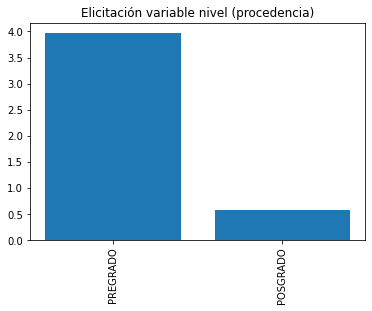

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = np.array(list(df_procedencia['TIPO_NIVEL'].value_counts()))/10000
bars = list(df_metadatos['TIPO_NIVEL'].value_counts().index)
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable nivel (procedencia)')

# Show graphic
plt.show()

In [48]:
nivel = Categorica(df_procedencia['TIPO_NIVEL'])

In [49]:
print(nivel.evaluacion_exactitud(distribucion_teorica=distribucion_teorica_nivel, categorias_teoricas=categorias_teoricas_nivel))
print(nivel.evaluacion_completitud())
print(nivel.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 81.42%
El porcentaje de completitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### Edad

In [50]:
maximo_teorico = max(df_metadatos['EDAD'])
minimo_teorico = (min(df_metadatos['EDAD']))
distribucion_teorica_edad = (list(np.histogram(df_metadatos['EDAD'], bins="sturges")[0]))

In [51]:
valores_edad = df_procedencia['EDAD']

Text(0.5, 1.0, 'Elicitación variable edad (procedencia)')

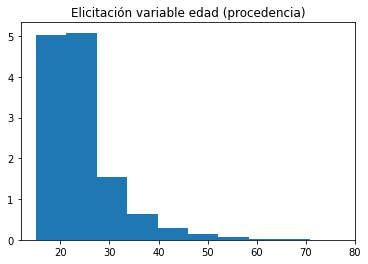

In [52]:
plt.hist(df_procedencia['EDAD'], weights=df_procedencia['EDAD']/70000)
plt.title('Elicitación variable edad (procedencia)')

In [53]:
edad = Numero(valores=valores_edad)

In [54]:
print(edad.evaluacion_exactitud(minimo_teorico=minimo_teorico, maximo_teorico=maximo_teorico, distribucion_teorica=distribucion_teorica_edad))
print(edad.evaluacion_completitud())
print(edad.evaluacion_accesibilidad(acceso=1,plantilla=1, presentacion=1,restriccion=1))

El porcentaje de actualidad para la variable es de 100.0%
El porcentaje de completitud para la variable es de 84.99%
El porcentaje de accesibilidad para la variable es de 90.0%


### Estado civil

In [30]:
# Se extrae la distribución teorica y las categorias teoricas
df_estado_civil = pd.DataFrame(df_metadatos['ESTADO_CIVIL'].value_counts())
df_estado_civil.reset_index(inplace=True)
suma = sum(df_estado_civil.sort_values('index')['ESTADO_CIVIL'].tolist())
numerador = np.array(df_estado_civil.sort_values('index')['ESTADO_CIVIL'].tolist())
distribucion_teorica_estado = list(map(lambda x: round(x, 4), list((numerador / suma)*10)))
categorias_teoricas_estado = list(map(lambda x: x.upper().strip(), (sorted(pd.DataFrame(df_procedencia['ESTADO_CIVIL'].value_counts()).index))))

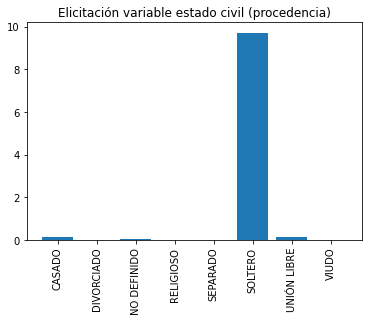

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = np.array([0.1267, 0.0009, 0.0301, 0.0018, 0.0159, 9.7051, 0.1148, 0.0048])
bars = (list(map(lambda x: x.upper().strip(), (sorted(pd.DataFrame(df_procedencia['ESTADO_CIVIL'].value_counts()).index)))))
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable estado civil (procedencia)')

# Show graphic
plt.show()

In [57]:
estado_civil = Categorica(df_procedencia['ESTADO_CIVIL'])

In [58]:
print(estado_civil.evaluacion_exactitud(distribucion_teorica=distribucion_teorica_estado, categorias_teoricas=categorias_teoricas_estado))
print(estado_civil.evaluacion_completitud())
print(estado_civil.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 97.77%
El porcentaje de completitud para la variable es de 99.87%
El porcentaje de consistencia para la variable es de 74.34%


### Celular

In [4]:
celular = Caracter(df_procedencia['TELEFONO_MOVIL'])

In [5]:
categorias_teoricas_celular = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '(', ')', '+')
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}
estandar = 'numero'

In [6]:
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}

In [11]:
print(celular.evaluacion_exactitud(numeros=True, letras=False, longitud=10))
print(celular.evaluacion_completitud())
print(celular.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

El porcentaje de exactitud para la variable es de 99.7%
El porcentaje de completitud para la variable es de 35.07%
El porcentaje de consistencia para la variable es de 99.49%


### Telefono

In [12]:
telefono = Caracter(df_procedencia['TELEFONO'])

In [13]:
print(telefono.evaluacion_exactitud(numeros=True, letras=False, longitud=6))
print(telefono.evaluacion_completitud())
print(telefono.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

El porcentaje de exactitud para la variable es de 99.27%
El porcentaje de completitud para la variable es de 13.62%
El porcentaje de consistencia para la variable es de 98.62%


### Dirección de procedencia

In [66]:

direccion = Caracter(df_procedencia['DIRECCION_PROCEDENCIA'])

In [18]:
categorias_teoricas_direccion = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'none', 'CL.', 'CRA.',\
      'DIG.', 'TRAV.', '#', 'A', 'B', 'C', 'D', 'E', '-')
diccionario_dominios_direccion = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , 'CL.':'nomenclatura', 'CRA.':'nomenclatura', 'DIG.':'nomenclatura', 'TRAV.':'nomenclatura', '#':'numeral',
     'A':'letra', 'B':'letra', 'C':'letra', 'D':'letra', 'E':'letra', '-':'separador'}
estandar_direccion = "nomenclatura numero letra numeral numero separador numero"

In [19]:
diccionario_dominios_direccion = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , 'CL.':'nomenclatura', 'CRA.':'nomenclatura', 'DIG.':'nomenclatura', 'TRAV.':'nomenclatura', '#':'numeral',
     'A':'letra', 'B':'letra', 'C':'letra', 'D':'letra', 'E':'letra', '-':'separador'}

In [69]:
print(direccion.evaluacion_exactitud(numeros=True, letras=True))
print(direccion.evaluacion_completitud())
print(direccion.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_direccion,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_direccion, letras=True))

El porcentaje de exactitud para la variable es de 95%
El porcentaje de completitud para la variable es de 98.8%
El porcentaje de consistencia para la variable es de 30.81%


### Nacionalidad

In [70]:
# Se extrae la distribución teorica y las categorias teoricas
df_extrajero = pd.DataFrame(df_metadatos['EXTRANJERO'].value_counts())
df_extrajero.reset_index(inplace=True)
suma = sum(df_extrajero.sort_values('index')['EXTRANJERO'].tolist())
numerador = np.array(df_extrajero.sort_values('index')['EXTRANJERO'].tolist())
distribucion_teorica_nacio = list(map(lambda x: round(x, 4), list((numerador / suma)*10)))
categorias_teoricas_nacio = list(map(lambda x: x.upper().strip(), (sorted(pd.DataFrame(df_procedencia['EXTRANJERO'].value_counts()).index))))

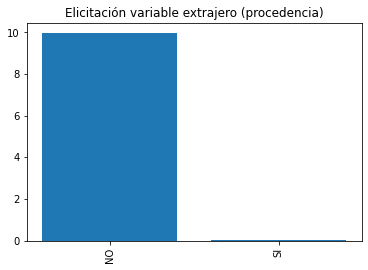

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = list(map(lambda x: round(x, 4), list((numerador / suma)*10)))
bars = ['NO', 'SI']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable extrajero (procedencia)')

# Show graphic
plt.show()

In [72]:
extranjero = Categorica(df_procedencia['EXTRANJERO'])

In [73]:
print(extranjero.evaluacion_exactitud(distribucion_teorica=distribucion_teorica_nacio, categorias_teoricas=categorias_teoricas_nacio))
print(extranjero.evaluacion_completitud())
print(extranjero.evaluacion_consistencia())

El porcentaje de exactitud para la variable es de 84.81%
El porcentaje de completitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### Departamento procedencia

In [74]:
df_departamento_procedencia = pd.DataFrame(df_metadatos['DEPTO_PROCEDENCIA'].value_counts())
df_departamento_procedencia.reset_index(inplace=True)
suma = sum(df_departamento_procedencia.sort_values('index')['DEPTO_PROCEDENCIA'].tolist())
numerador = np.array(df_departamento_procedencia.sort_values('index')['DEPTO_PROCEDENCIA'].tolist())
distribucion_teorica = list(map(lambda x: round(x, 4), list((numerador / suma)*10)))
categorias_teoricas = df_departamento_procedencia.sort_values('index')['index'].tolist()

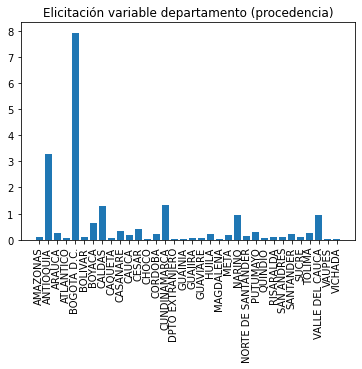

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = list(map(lambda x: round(x, 4), list((numerador / suma)*20)))
bars = categorias_teoricas
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.xticks(rotation=90)
plt.title('Elicitación variable departamento (procedencia)')

# Show graphic
plt.show()

In [76]:

departamento = Categorica(df_procedencia['DEPTO_PROCEDENCIA'])

In [77]:
print(departamento.evaluacion_exactitud(distribucion_teorica=distribucion_teorica, categorias_teoricas=categorias_teoricas))
print(departamento.evaluacion_completitud())
print(departamento.evaluacion_consistencia(tildes=False,  minusculas=False, espacio = True))

El porcentaje de exactitud para la variable es de 100.0%
El porcentaje de completitud para la variable es de 99.61%
El porcentaje de consistencia para la variable es de 100.0%


### Telefono procedencia

In [14]:
celular = Caracter(df_procedencia['TEL_PROCEDENCIA'])

In [20]:
categorias_teoricas_celular = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '(', ')', '+')
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}
estandar = 'numero'

In [21]:
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}

In [17]:
print(celular.evaluacion_exactitud(numeros=True, letras=False, longitud=6))
print(celular.evaluacion_completitud())
print(celular.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

El porcentaje de exactitud para la variable es de 99.33%
El porcentaje de completitud para la variable es de 98.7%
El porcentaje de consistencia para la variable es de 98.83%


# Estandarización de datos y eliminación de errores

### Dirección

In [22]:
from tipos.estandarizar_direccion import arreglar_direccion
categorias_teoricas = ('CL.', 'CRA.', 'DIG.', 'TRAV.')

direcciones_buenas = []
for i in df_procedencia['DIRECCION_PROCEDENCIA']:
    direcciones_buenas.append(arreglar_direccion(str(i), categorias_teoricas))

In [23]:
df_procedencia['DIRECCION_PROCEDENCIA'] = direcciones_buenas

### Celular

In [24]:
from tipos.estandarizar_numero_telefono import estandar_numero

In [25]:
celular_bueno = []
for i in df_procedencia['TELEFONO_MOVIL']:
    celular_bueno.append(estandar_numero(str(i)))

In [26]:
df_procedencia['TELEFONO_MOVIL'] = celular_bueno

### Telefono

In [27]:
telefono_bueno = []
for i in df_procedencia['TELEFONO']:
    telefono_bueno.append(estandar_numero(str(i)))

In [28]:
df_procedencia['TELEFONO'] = telefono_bueno

### Telefono procedencia

In [29]:
telefono_p_bueno = []
for i in df_procedencia['TEL_PROCEDENCIA']:
    telefono_p_bueno.append(estandar_numero(str(i)))
df_procedencia['TEL_PROCEDENCIA'] = telefono_p_bueno

In [30]:
df_procedencia['TEL_PROCEDENCIA'] = telefono_p_bueno

### Estado civil

In [31]:
from tipos.estandarizar_cadena import arreglar_cadena

In [32]:
estado_civil_bueno = []
for i in df_procedencia['ESTADO_CIVIL']:
    estado_civil_bueno.append(arreglar_cadena(str(i), mayuscular=True, minuscular=False, espacios=True))

In [33]:
df_procedencia['ESTADO_CIVIL'] = estado_civil_bueno

# Imputación de datos

In [34]:
edad_imputada = pd.read_csv('df_procedencia_imputada.csv', encoding="Latin1")['EDAD']

In [35]:
df_procedencia['EDAD'] =   edad_imputada

# Evaluación de metricas despues de limpiar datos

### Dirección

In [36]:
direccion = Caracter(df_procedencia['DIRECCION_PROCEDENCIA'])

In [38]:
print(direccion.evaluacion_consistencia(estandar=estandar_direccion, diccionario_dominios=diccionario_dominios_direccion,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_direccion, letras=True))
print(direccion.evaluacion_exactitud(numeros=True, letras=True, longitud=10))


El porcentaje de consistencia para la variable es de 95.96%
El porcentaje de exactitud para la variable es de 100.0%


### Celular

In [50]:
celular = Caracter(df_procedencia['TELEFONO_MOVIL'])

In [39]:
categorias_teoricas_celular = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '(', ')', '+')
diccionario_dominios_celular = {'0':'numero', '1':'numero', '2':'numero',\
     '3':'numero', '4':'numero', '5':'numero', '6':'numero', '7':'numero', '8':'numero', '9':'numero', 'none':'toquen_malo'
     , '(':'agrupador', '+':'indicativo', ')':'agrupador'}
estandar = 'numero'

In [52]:
print(celular.evaluacion_exactitud(numeros=True, letras=False, longitud=10))

[15935]
El porcentaje de exactitud para la variable es de 99.87%


In [53]:
print(celular.evaluacion_exactitud(numeros=True, letras=False, longitud=10))
print(celular.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

[15935]
El porcentaje de exactitud para la variable es de 99.87%
El porcentaje de consistencia para la variable es de 100.0%


### Telefono

In [54]:
telefono = Caracter(df_procedencia['TELEFONO'])

In [56]:
print(telefono.evaluacion_exactitud(numeros=True, letras=False, longitud=6))
print(telefono.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = True, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

[6109]
El porcentaje de exactitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### TEL_PROCEDENCIA

In [38]:
telefono = Caracter(df_procedencia['TEL_PROCEDENCIA'])

In [57]:
print(telefono.evaluacion_exactitud(numeros=True, letras=False, longitud=6))
print(celular.evaluacion_consistencia(estandar=estandar, diccionario_dominios=diccionario_dominios_celular,\
     tildes = False, numeros = True,\
     mayusculas = False, minusculas = False,\
              categorias_teoricas=categorias_teoricas_celular, letras=False))

[6109]
El porcentaje de exactitud para la variable es de 100.0%
El porcentaje de consistencia para la variable es de 100.0%


### Estado civil

In [59]:
estado_civil = Categorica(df_procedencia['ESTADO_CIVIL'])

In [63]:

print(estado_civil.evaluacion_consistencia(caracteres_especiales=False, mayusculas=True, minusculas=False,\
         espacio = True, tildes = False))

El porcentaje de consistencia para la variable es de 100.0%


# Exportar base lista

In [61]:
df_procedencia.to_excel('procedencia_final.xlsx')